In [1]:
# libraries
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
import seaborn as sns
sns.set_style("white")
import pandas as pd
my_dpi=96

In [22]:
# Get the data (csv file is hosted on the web)
url = 'https://python-graph-gallery.com/wp-content/uploads/gapminderData.csv'
data = pd.read_csv(url)
#data=pd.read_csv('gapminderData.csv')
data.head()

,country,year,pop,continent,lifeExp,gdpPercap
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106


In [23]:
# And I need to transform my categorical column (continent) in a numerical value group1->1, group2->2...
data['continent']=pd.Categorical(data['continent'])

In [24]:
anos=data.year.unique()

<IPython.core.display.Javascript object>


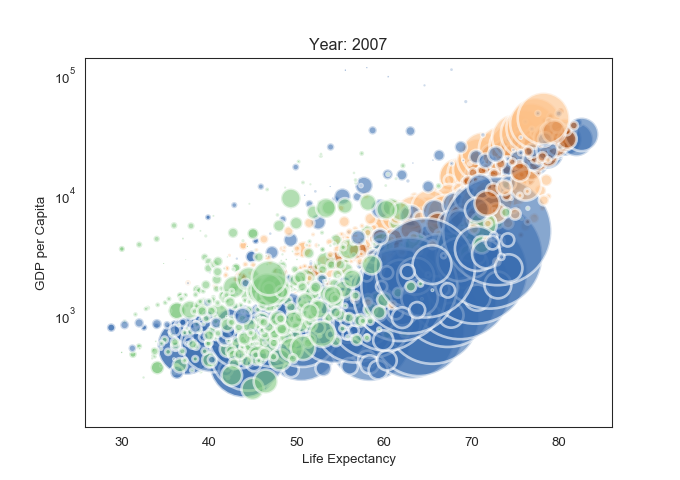

In [25]:
%matplotlib notebook
%matplotlib notebook

# initialize a figure
#fig=plt.figure(figsize=(680/my_dpi, 480/my_dpi), dpi=my_dpi)
fig, ax = plt.subplots(figsize=(680/my_dpi, 480/my_dpi), dpi=my_dpi)

# Add titles (main and on axis)
plt.yscale('log')
plt.xlabel("Life Expectancy")
plt.ylabel("GDP per Capita")
plt.ylim(100,100000)
plt.xlim(30, 90)

def animate(i):
    plt.title("Year: "+str(anos[i]) )
    tmp=data[ data.year == anos[i] ]
    scut=plt.scatter(tmp['lifeExp'], tmp['gdpPercap'] , s=tmp['pop']/200000 , c=tmp['continent'].cat.codes, cmap="Accent", alpha=0.6, edgecolors="white", linewidth=2)
    #scut=ax.scatter(tmp['lifeExp'], tmp['gdpPercap'] , s=tmp['pop']/200000 , c=tmp['continent'].cat.codes, cmap="Accent", alpha=0.6, edgecolors="white", linewidth=2)
    
ani = animation.FuncAnimation(fig, animate, frames=len(anos), interval=200, blit=False, repeat=False)
    
plt.show()


### Explique a metodologia para criar a animação em cada um dos casos (versões). Comente-as. Justifique

O método utilizado para utilizar a versão sem legenda foi o plot scatter utilizando como variável o avançar dos anos demonstrando a alteração da life expectancy e GDP per capita na função animate. Esta função vai buscar os anos á variavel "anos" que está definida para demonstrar todos os anos existentes (data.year.unique()) cruando informação com todos os continentes demonstrando assim no gráfico. Esta versão vai mantendo todas as imagens formadas sobrepondo umas ás outras conseguindo assim demonstrar a evolução de todos os continentes num só gráfico.

### Temos “bolhas” de cinco (5) cores diferentes. O que representa cada cor? Justifique, com descrição detalhada do processo.

In [20]:
Cont_numb = data.continent.unique()
len(Cont_numb)

5

In [19]:
Cont = data.continent.unique()
Cont

array(['Asia', 'Europe', 'Africa', 'Americas', 'Oceania'], dtype=object)

Cada cor representa o continente de cada país neste caso, Asia, Europa, Africa, Americas e Oceania

### Inserir uma legenda ou legendas com a cor das “bolhas” e o seu significado, posicionada(s) em área(s) que não se sobreponha(m) às “bolhas”. Fundamente as opções tomadas.